<a href="https://colab.research.google.com/github/rajjjxd/Deep-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.17.0


In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#for categorical values, we will create dummy variables
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)


In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,True,False,True


In [ ]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#pre-process is done, now we'll construct an ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout, BatchNormalization


In [ ]:
#initialising the ANN
classifier = Sequential()


In [ ]:
#adding thr input layer
classifier.add(Dense(units=11, activation='relu'))

In [ ]:
#adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [ ]:
#adding the output
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=40)

Epoch 1/40
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6846 - loss: 0.6041 - val_accuracy: 0.8016 - val_loss: 0.4509
Epoch 2/40
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8127 - loss: 0.4195 - val_accuracy: 0.8107 - val_loss: 0.4195
Epoch 3/40
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8148 - loss: 0.4035 - val_accuracy: 0.8118 - val_loss: 0.4033
Epoch 4/40
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8245 - loss: 0.3910 - val_accuracy: 0.8129 - val_loss: 0.3925
Epoch 5/40
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8282 - loss: 0.3748 - val_accuracy: 0.8129 - val_loss: 0.3882
Epoch 6/40
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8294 - loss: 0.3635 - val_accuracy: 0.8342 - val_loss: 0.3837
Epoch 7/40
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8427 - loss: 0.3683 - val_accuracy: 0.8391 - val_loss: 0.3800
Epoch 8/40
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8470 - loss: 0.3592 - val_accuracy: 0.

In [ ]:
# list all data in history

print(model_history.history.keys())

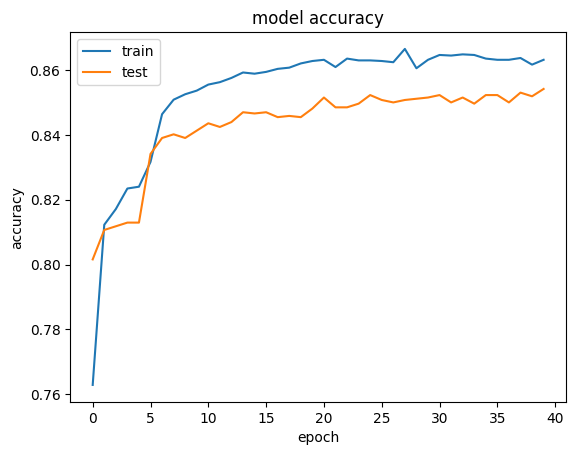

In [ ]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.8595